### This notebook aims to classify the quality of red wine using various parameters or features. This will be a classification problem and will try to use various classification models to find best accuracy score.


1. [About Data](#1)
1. [Importing Libraries and Reading the Dataset](#2)
1. [Data Visualization and Preprocessing and handling imbalance dataset](#3)
1. [Model Creation](#4) 
    * [Logistic Regression](#5) 
    * [K-Nearest Neighbors(K-NN)](#6)
    * [Random Forest](#7)
    * [Support Vector Machine](#8)
    * [Decision Tree](#9)
    * [GridSearchCV](#10)
    
1. [Conclusion](#11)


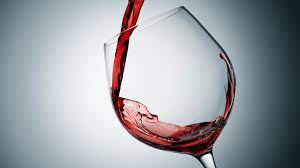

## <span id="1"></span>  About Data

**fixed acidity**: most acids involved with wine or fixed or nonvolatile

**volatile acidity**: the amount of acetic acid in wine

**citric acid**: found in small quantities, citric acid can add 'freshness'                    and flavor to wines

**residual sugar**: the amount of sugar remaining after fermentation stops

**chlorides**: the amount of salt in the wine

**free sulfur dioxide**: the free form of SO2 exists in equilibrium between                            molecular SO2 (as a dissolved gas) and bisulfite ion

**total sulfur dioxide**: amount of free and bound forms of S02

**density**: the density of water is close to that of water depending on the              percent alcohol and sugar content

**pH**: describes how acidic or basic a wine is on a scale from 0 (very               acidic) to 14 (very basic)

**sulphates**: a wine additive which can contribute to sulfur dioxide gas                   (S02) levels

**alcohol**: the percent alcohol content of the wine
             Output Variable:

## <span id="2"></span> Importing Libraries

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
wine_data = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [ ]:
wine_data.head(10)

## <span id="3"></span>  Data Visualization and preprocessing

In [ ]:
wine_data.info()
# No null values

In [ ]:
wine_data.quality.value_counts()
# we have 6 kind of quality scores and most of them are 5 and 6

In [ ]:
wine_data.shape

In [ ]:
sns.countplot(x='quality',data=wine_data)

#### Lets compare each and every feature with quality feature to get more insights

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(data=wine_data, x="quality", y="fixed acidity")

### we can see that fixed acidity does not provide much inforamation to classify quality.

In [ ]:
 
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'volatile acidity', data = wine_data)

### As the quality score increases volatile acidity composition decreases.

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'citric acid', data = wine_data)

### Composition of citric acid go higher as we go higher in the quality of the wine

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'residual sugar', data = wine_data)

#### no specific relation

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'chlorides', data = wine_data)

### Composition of chloride also go down as we go higher in the quality of the wine

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data)

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data)

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'sulphates', data = wine_data)

### Sulphates level goes higher with the quality of wine

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'alcohol', data = wine_data)

### alcohol level goes higher with the quality of wine

### Lets summerize what we can infer from the above analysis.
1. #### With the increase of the quality score, the composition of chlorides and volatile acidity decreases.

2. #### With the increase for quality score, the compostion of alcohol, sulphates and citric acid increases.

In [ ]:
corr = wine_data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
# No correlation found.

In [ ]:
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)
#from 2 to 6.5 it is considered as bad and 6.5 to 8 as good

In [ ]:
wine_data.head(10)

In [ ]:
#Using Label encoder, transforming catagorical features to numerical features.
label_quality = LabelEncoder()

In [ ]:
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])

In [ ]:
wine_data['quality'].value_counts()

In [ ]:
sns.countplot(wine_data['quality'])

## Handeling imbalance dataset

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = os.fit_resample(X, y)

In [ ]:
X_train_res.shape, y_train_res.shape

In [ ]:
sns.countplot(y_train_res)

### Now we have same number for good and bad quality of wine.

# <span id="4"></span> Model Creation

In [ ]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# <span id="5"></span> Logistic Regression

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
# predicting cross validation score
cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = lr.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_train)

y_pred_lr_test = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_test)

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred_lr_test)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# <span id="6"></span> K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

In [ ]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train =knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

In [ ]:
con_mat = confusion_matrix(y_test,y_pred_knn_test)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# <span id="7"></span> Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

In [ ]:
# Predicting Cross Validation Score
cv_rfc = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_rfc.mean())

y_pred_rfc_train =rfc.predict(X_train)
accuracy_rfc_train = accuracy_score(y_train, y_pred_rfc_train)
print("Training set: ", accuracy_rfc_train)

y_pred_rfc_test = rfc.predict(X_test)
accuracy_rfc_test = accuracy_score(y_test, y_pred_rfc_test)
print("Test set: ", accuracy_rfc_test)

In [ ]:
con_mat = confusion_matrix(y_test,y_pred_rfc_test)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# <span id="8"></span> Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
cv_svc = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_svc.mean())

y_pred_svc_train =svc.predict(X_train)
accuracy_svc_train = accuracy_score(y_train, y_pred_rfc_train)
print("Training set: ", accuracy_rfc_train)

y_pred_svc_test = svc.predict(X_test)
accuracy_svc_test = accuracy_score(y_test, y_pred_svc_test)
print("Test set: ", accuracy_svc_test)

In [ ]:
con_mat = confusion_matrix(y_test,y_pred_svc_test)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# <span id="9"></span>Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

In [ ]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

In [ ]:
con_mat = confusion_matrix(y_test,y_pred_dt_test)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


# <span id="10"></span>GridSeachCV

In [ ]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
svc2 = SVC()
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
accuracy_dt_test = accuracy_score(y_test,pred_svc2)
print("Test set: ", accuracy_dt_test)

# <span id="11"></span>Conclusion
### Random forest gives us highest accuracy.


### Thanks for reading.If you like the notebook,do upvote.